Ecole Normale Supérieure de l'Enseignement Technique - Mohammedia<br>
Master : Systèmes Distribués et Intelligence Artificielle<br>
Module : Machine Learning<br>
<b>AIT HAMMOU Reda et TRKZI Omar</b><br>
Année universitaire 2023 - 2024


<center>
    
# Intrusion Detection System Using Machine Learning Algorithms
    
</center>

## Problem Statement : 
The objective is to build a network intrusion detector, a model designed to predictively differentiate between harmful connections, known as intrusions or attacks, and harmless, normal connections.
## Introduction :
An Intrusion Detection System (IDS) is a software application designed to detect unauthorized access or suspicious activity on a network or system using various machine learning algorithms. IDS serves as a vigilant guardian, monitoring the network to identify potential threats and protect against unauthorized access, including potential insider threats. The primary objective of an intrusion detection system is to develop a predictive model, typically a classifier, capable of distinguishing between "bad connections" (intrusions or attacks) and "good (normal) connections".
Attacks fall into four main categories:

- **DOS**: denial-of-service, e.g. syn flood;
- **R2L**: unauthorized access from a remote machine, e.g. guessing password;
- **U2R**: unauthorized access to local superuser (root) privileges, e.g., various “buffer overflow” attacks;
- **probing**: surveillance and another probing, e.g., port scanning.
## Dataset Used :
[KDD Cup 1999 dataset](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)
## Algorithms Applied : 
- Gaussian Naive Bayes
- Decision Tree
- Random Forest
- SVM
- Logistic Regression
- Gradient Boosting.



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
with open("kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [4]:
with open("training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [105]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [106]:
print(attacks_types)

{'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}


# READING DATASET

In [107]:
path = "C:\\Users\\acer\\Desktop\\ML Project\\kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [108]:
df.shape

(494021, 43)

In [9]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [10]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [11]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# DATA PREPROCESSING

In [12]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'service', 'protocol_type']

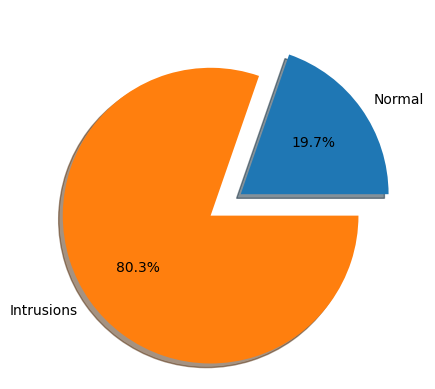

In [14]:
#The frequency of normal connections compared to the frequency of detected intrusions
type_frequencies = df['target'].value_counts()
normal_frequency = type_frequencies['normal.']
intrusion_frequency = sum([count for outcome_type, count in type_frequencies.items() if outcome_type != 'normal.'])

figure = plt.figure()
plt.pie(
    [normal_frequency, intrusion_frequency],
    labels=["Normal", "Intrusions"],
    explode=[0, .25],
    autopct='%1.1f%%',
    shadow=True,
)
plt.show()


In [15]:
#The frequency of each type of detected intrusion is computed below
intrusion_frequencies = type_frequencies.drop(labels=["normal."])

pd.set_option('display.max_rows', None)
display(
    pd.DataFrame(
        intrusion_frequencies.values,
        columns=['frequency'],
        index=[intrusion_name[:-1] for intrusion_name in intrusion_frequencies.index]
    ).sort_values(by="frequency", ascending=False)
)
pd.set_option('display.max_rows', 10)


,frequency
smurf,280790
neptune,107201
back,2203
satan,1589
ipsweep,1247
portsweep,1040
warezclient,1020
teardrop,979
pod,264
nmap,231


 # CATEGORICAL FEATURES DISTRIBUTION

In [16]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

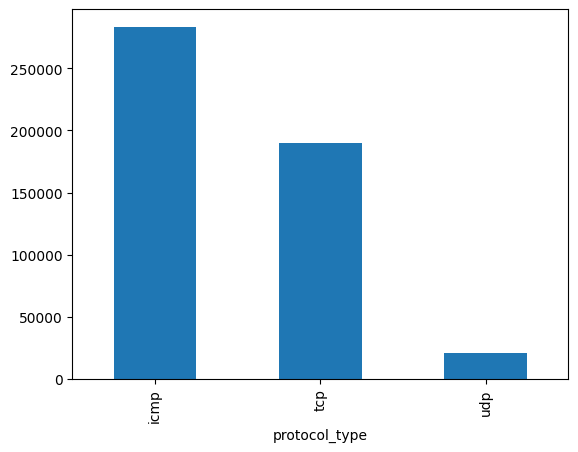

In [17]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

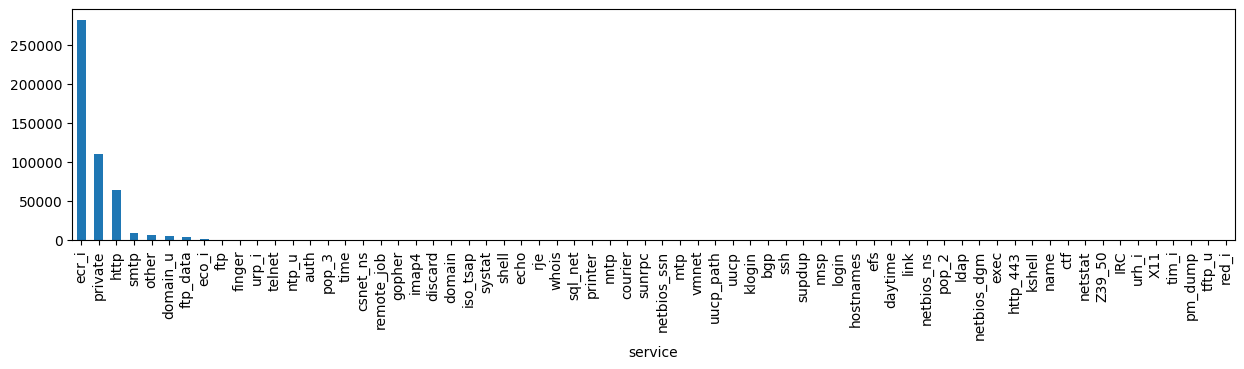

In [18]:
plt.figure(figsize=(15,3))
bar_graph('service')

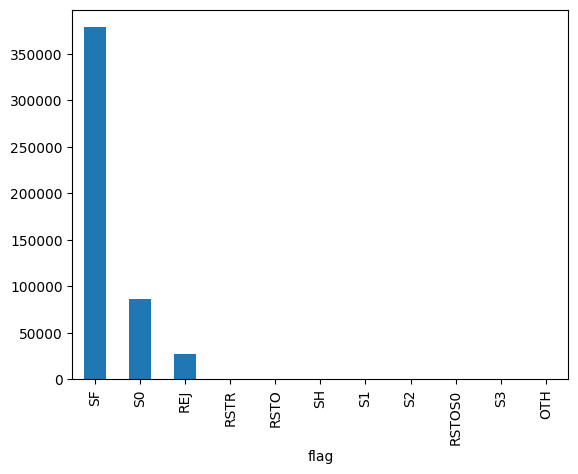

In [19]:
bar_graph('flag')

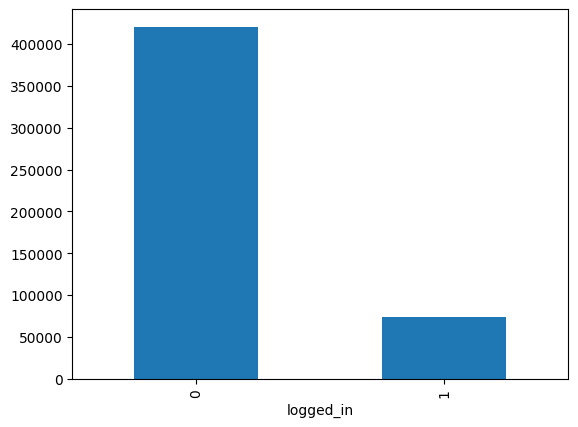

In [20]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

# TARGET FEATURE DISTRIBUTION

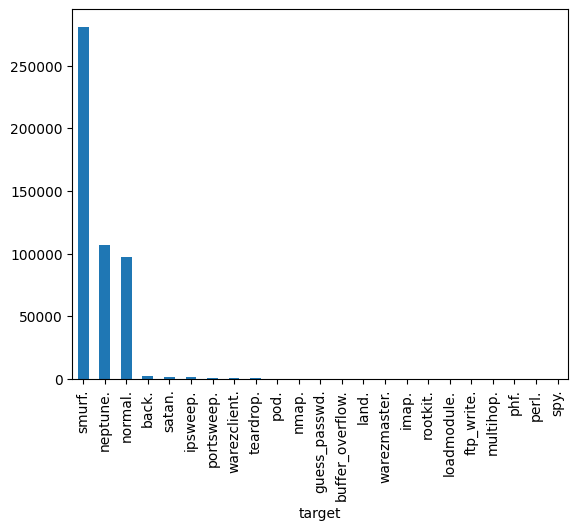

In [21]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

In [22]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

# DATA CORRELATION

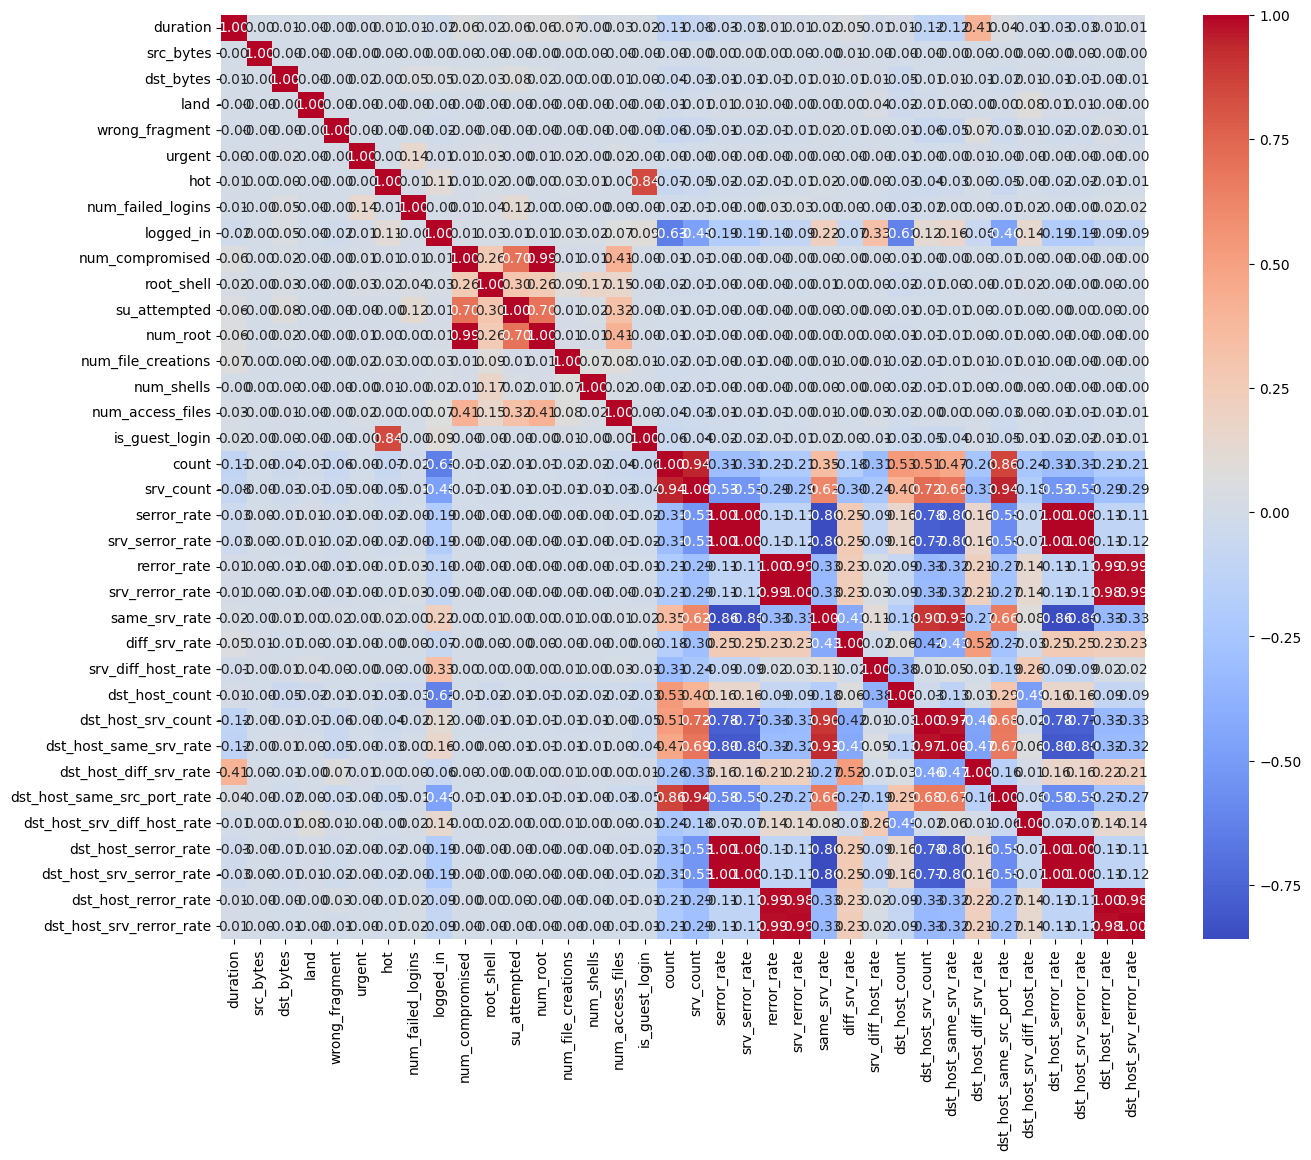

In [23]:

# Drop columns with NaN values
df = df.dropna(axis='columns')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Keep columns where there are more than 1 unique values
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

In [24]:
correlations = {
    'num_root and num_compromised': df['num_root'].corr(df['num_compromised']),
    'srv_serror_rate and serror_rate': df['srv_serror_rate'].corr(df['serror_rate']),
    'srv_count and count': df['srv_count'].corr(df['count']),
    'srv_rerror_rate and rerror_rate': df['srv_rerror_rate'].corr(df['rerror_rate']),
    'dst_host_same_srv_rate and dst_host_srv_count': df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count']),
    'dst_host_srv_serror_rate and dst_host_serror_rate': df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate']),
    'dst_host_srv_rerror_rate and dst_host_rerror_rate': df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate']),
    'dst_host_same_srv_rate and same_srv_rate': df['dst_host_same_srv_rate'].corr(df['same_srv_rate']),
    'dst_host_srv_count and same_srv_rate': df['dst_host_srv_count'].corr(df['same_srv_rate']),
    'dst_host_same_src_port_rate and srv_count': df['dst_host_same_src_port_rate'].corr(df['srv_count']),
    'dst_host_serror_rate and serror_rate': df['dst_host_serror_rate'].corr(df['serror_rate']),
    'dst_host_serror_rate and srv_serror_rate': df['dst_host_serror_rate'].corr(df['srv_serror_rate']),
    'dst_host_srv_serror_rate and serror_rate': df['dst_host_srv_serror_rate'].corr(df['serror_rate']),
    'dst_host_srv_serror_rate and srv_serror_rate': df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate']),
    'dst_host_rerror_rate and rerror_rate': df['dst_host_rerror_rate'].corr(df['rerror_rate']),
    'dst_host_rerror_rate and srv_rerror_rate': df['dst_host_rerror_rate'].corr(df['srv_rerror_rate']),
    'dst_host_srv_rerror_rate and rerror_rate': df['dst_host_srv_rerror_rate'].corr(df['rerror_rate']),
    'dst_host_srv_rerror_rate and srv_rerror_rate': df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])
}

for pair, correlation in correlations.items():
    print(f'Correlation between {pair}: {correlation}')


Correlation between num_root and num_compromised: 0.9938277978738127
Correlation between srv_serror_rate and serror_rate: 0.9983615072725588
Correlation between srv_count and count: 0.9436670688882609
Correlation between srv_rerror_rate and rerror_rate: 0.9947309539818194
Correlation between dst_host_same_srv_rate and dst_host_srv_count: 0.9736854572953938
Correlation between dst_host_srv_serror_rate and dst_host_serror_rate: 0.9981559173373276
Correlation between dst_host_srv_rerror_rate and dst_host_rerror_rate: 0.9848038371110385
Correlation between dst_host_same_srv_rate and same_srv_rate: 0.9278080342691319
Correlation between dst_host_srv_count and same_srv_rate: 0.8989546630323972
Correlation between dst_host_same_src_port_rate and srv_count: 0.9449263676783213
Correlation between dst_host_serror_rate and serror_rate: 0.9986729680105016
Correlation between dst_host_serror_rate and srv_serror_rate: 0.997835300373957
Correlation between dst_host_srv_serror_rate and serror_rate: 0.

In [109]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [110]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [111]:
df.shape

(494021, 35)

In [28]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [112]:
#df_std = df.std()
#df_std = df_std.sort_values(ascending = True)
#df_std
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
df_std = numeric_df.std()  # Compute the standard deviation
df_std = df_std.sort_values(ascending=True)  # Sort the standard deviations
df_std

is_host_login             0.000000
num_outbound_cmds         0.000000
urgent                    0.005510
land                      0.006673
su_attempted              0.007793
                         ...      
count                   213.147412
srv_count               246.322817
duration                707.746472
dst_bytes             33040.001252
src_bytes            988218.101050
Length: 30, dtype: float64

In [30]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [113]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [114]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
           ...  
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, Length: 11, dtype: int64

In [115]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [116]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [117]:
df.drop('service',axis = 1,inplace= True)

In [118]:
df.shape

(494021, 34)

In [37]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [38]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
                                ...   
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
target                          object
Attack Type                     object
Length: 34, dtype: object

# MODELLING

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

In [124]:
# Drop the target variable from the dataframe
df = df.drop(['target',], axis=1)
X = df.drop(['Attack Type'], axis=1)
Y = df['Attack Type']

# Apply feature selection
k_best = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = k_best.fit_transform(X, Y)

# Rescale selected features
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X_selected)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

# Optionally, inspect selected features and their scores
selected_features_df = pd.DataFrame({
    'Feature': X.columns[k_best.get_support()],
    'Score': k_best.scores_[k_best.get_support()]
})
selected_features_df.sort_values(by='Score', ascending=False, inplace=True)
print(selected_features_df.head(10))  # Print the top 10 features with highest scores


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(330994, 10) (163027, 10)
(330994,) (163027,)
                       Feature          Score
2                    logged_in  227613.808081
4                        count  175232.710864
6               dst_host_count   98609.790813
0                protocol_type   78635.215288
5                    srv_count   64738.112122
7       dst_host_diff_srv_rate   38691.382639
3                   root_shell   38353.590142
8  dst_host_same_src_port_rate   37405.405398
9  dst_host_srv_diff_host_rate   34537.741869
1                          hot   31394.131411


In [126]:
# List of columns to keep
columns_to_keep = [
    'logged_in', 
    'count', 
    'dst_host_count', 
    'protocol_type', 
    'srv_count', 
    'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 
    'dst_host_srv_diff_host_rate',
    'hot',
    'root_shell',
    'Attack Type'
]

# Drop columns not in the list
df_selected = df[columns_to_keep]


In [128]:
df_selected

,logged_in,count,dst_host_count,protocol_type,srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,hot,root_shell,Attack Type
0,1,8,9,1,8,0.0,0.11,0.00,0,0,normal
1,1,8,19,1,8,0.0,0.05,0.00,0,0,normal
2,1,8,29,1,8,0.0,0.03,0.00,0,0,normal
3,1,6,39,1,6,0.0,0.03,0.00,0,0,normal
4,1,6,49,1,6,0.0,0.02,0.00,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...
494016,1,4,86,1,5,0.0,0.01,0.05,0,0,normal
494017,1,6,6,1,6,0.0,0.17,0.05,0,0,normal
494018,1,6,16,1,18,0.0,0.06,0.05,0,0,normal
494019,1,6,26,1,12,0.0,0.04,0.05,0,0,normal


In [130]:
print(df_selected.shape)

# Target variable and train set
Y = df_selected[['Attack Type']]
X = df_selected.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 11)
(330994, 10) (163027, 10)
(330994, 1) (163027, 1)


## MODELS

## GAUSSIAN NAIVE BAYES

In [131]:
from sklearn.naive_bayes import GaussianNB

In [132]:
model1 = GaussianNB()

In [133]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [134]:
print("Training time: ",end_time-start_time)

Training time:  0.34725117683410645


In [135]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [136]:
print("Testing time: ",end_time-start_time)

Testing time:  0.13888764381408691


In [137]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8900886420901889
Test score is: 0.8911468652431805


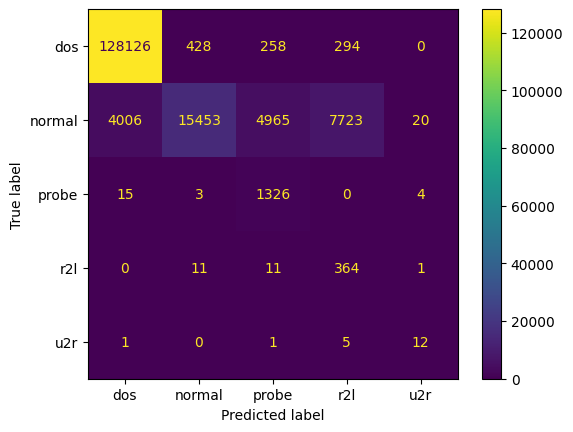

In [138]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(model1, X_test, Y_test)# Displaying the confusion matrix for the classifier
plt.show()

## DECISION TREE

In [139]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [140]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [141]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [142]:
print("Training time: ",end_time-start_time)

Training time:  0.5231831073760986


In [143]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [144]:
print("Testing time: ",end_time-start_time)

Testing time:  0.06517243385314941


In [145]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9869151706677463
Test score is: 0.9869162776717967


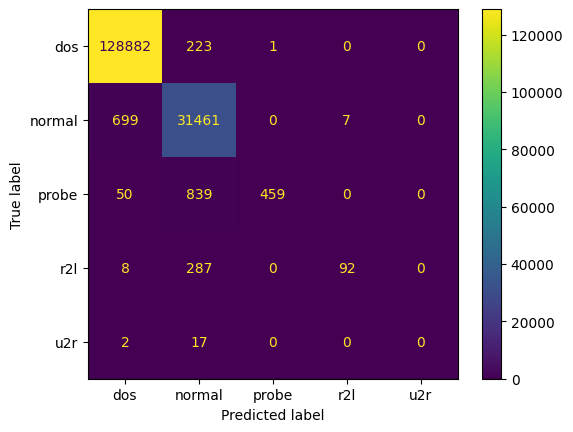

In [146]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(model2, X_test, Y_test)# Displaying the confusion matrix for the classifier
plt.show()

## RANDOM FORREST

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
model3 = RandomForestClassifier(n_estimators=30)

In [149]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [150]:
print("Training time: ",end_time-start_time)

Training time:  4.651783466339111


In [151]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [152]:
print("Testing time: ",end_time-start_time)

Testing time:  0.4181389808654785


In [153]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.999685794908669
Test score is: 0.9990431032896392


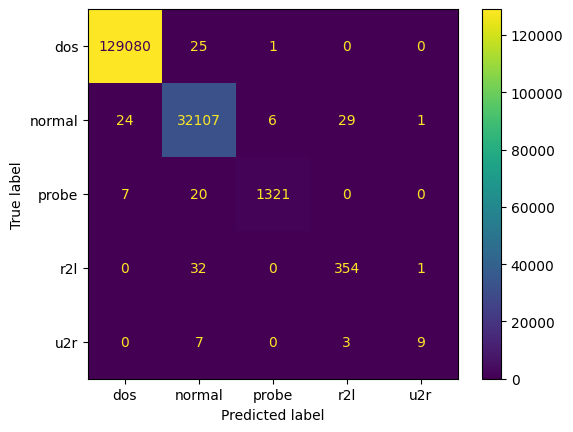

In [154]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(model3, X_test, Y_test)# Displaying the confusion matrix for the classifier
plt.show()

## SVM

In [155]:
from sklearn.svm import SVC

In [156]:
model4 = SVC(gamma = 'scale')

In [157]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [158]:
print("Training time: ",end_time-start_time)

Training time:  214.6109175682068


In [159]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [160]:
print("Testing time: ",end_time-start_time)

Testing time:  80.83094906806946


In [161]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9948246796014429
Test score is: 0.99491495273789


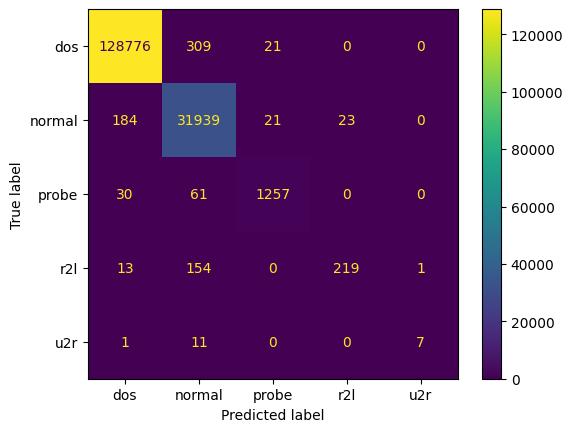

In [162]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(model4, X_test, Y_test)# Displaying the confusion matrix for the classifier
plt.show()

## LOGISTIC REGRESSION

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
model5 = LogisticRegression(max_iter=1200000)

In [165]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [166]:
print("Training time: ",end_time-start_time)

Training time:  12.75673246383667


In [167]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [168]:
print("Testing time: ",end_time-start_time)

Testing time:  0.015623092651367188


In [169]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9866493048212355
Test score is: 0.986198605139026


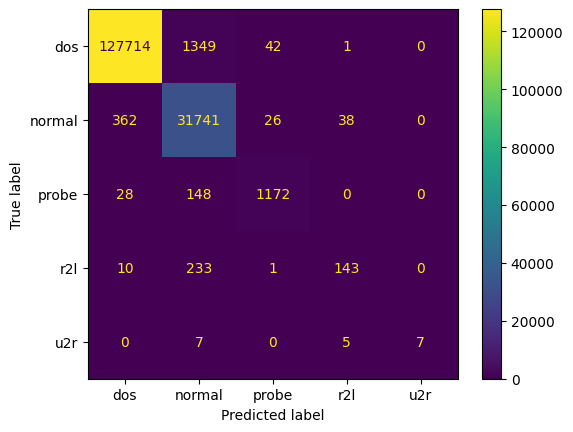

In [170]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(model5, X_test, Y_test)# Displaying the confusion matrix for the classifier
plt.show()

## GRADIENT BOOSTING CLASSIFIER

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
model6 = GradientBoostingClassifier(random_state=0)

In [173]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [174]:
print("Training time: ",end_time-start_time)

Training time:  130.63467860221863


In [175]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [176]:
print("Testing time: ",end_time-start_time)

Testing time:  0.8239307403564453


In [177]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9981721723052381
Test score is: 0.9978776521680458


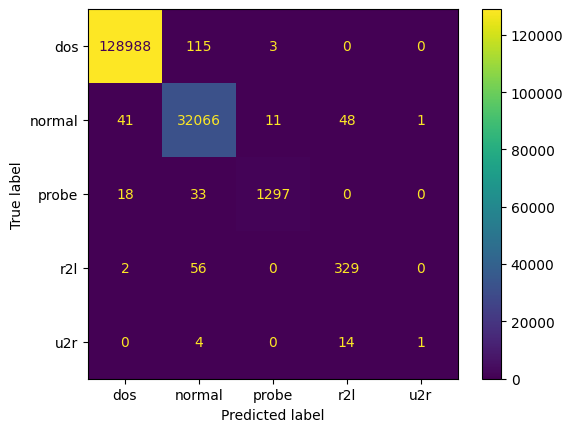

In [178]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(model6, X_test, Y_test)# Displaying the confusion matrix for the classifier
plt.show()

## Voting Classifier

In [179]:
#We used the ensemble of the two models RandomForrestCLassifier and DecisionTreeClassifier
#because of the RandomForrestClassifier higher accuracy and thhe DecisionTreeClassifier lower time in both training and testing
from sklearn.ensemble import VotingClassifier

# Création de l'ensemble de modèles
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', model3),
    ('Decision Tree', model2)
], voting='soft') 

# Entraînement de l'ensemble
start_time = time.time()
ensemble_model.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [180]:
print("Training time: ",end_time-start_time)

Training time:  4.480981349945068


In [181]:
start_time = time.time()
Y_test_pred_ensemble = ensemble_model.predict(X_test)
end_time = time.time()

In [182]:
print("Testing time : ", end_time-start_time)

Testing time :  0.4327683448791504


In [183]:
print("Train score is:", ensemble_model.score(X_train, Y_train))
print("Test score is:",ensemble_model.score(X_test,Y_test))

Train score is: 0.9990513423204046
Test score is: 0.998466511682114


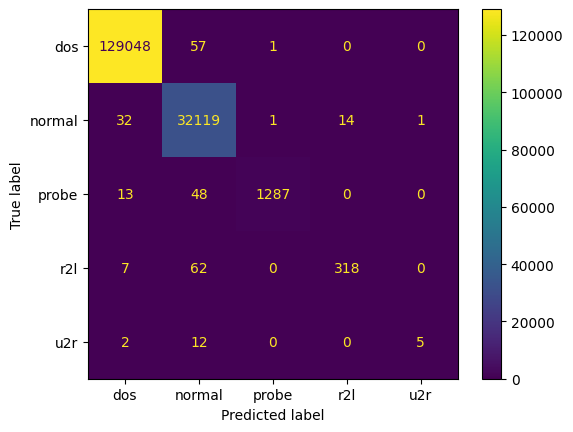

In [184]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(ensemble_model, X_test, Y_test)# Displaying the confusion matrix for the classifier
plt.show()

### TRAINING ACCURACY

<BarContainer object of 7 artists>

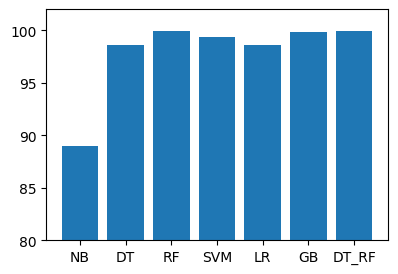

In [187]:
names = ['NB','DT','RF','SVM','LR','GB','DT_RF']
values = [89,98.6,99.96,99.4,98.6,99.8,99.9]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [96]:
#f.savefig('training_accuracy_figure.png',bbox_inches='tight')

## TESTING ACCURACY

<BarContainer object of 7 artists>

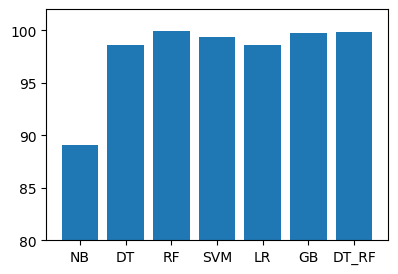

In [188]:
names = ['NB','DT','RF','SVM','LR','GB','DT_RF']
values = [89.11,98.6,99.9,99.4,98.61,99.7,99.84]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [98]:
#f.savefig('test_accuracy_figure.png',bbox_inches='tight')

## TRAINING TIME

<BarContainer object of 7 artists>

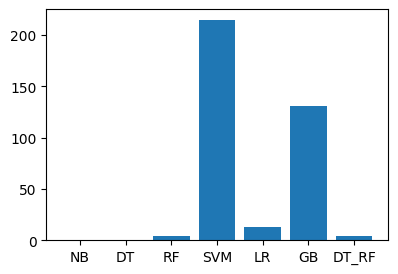

In [190]:
names = ['NB','DT','RF','SVM','LR','GB','DT_RF']
values = [0.34,0.52,4.65,214.31,12.756,130.63,4.48]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
test 0.13 0.06 0.41 80.83 0.0156 0.82 0.43

## TESTING TIME

<BarContainer object of 7 artists>

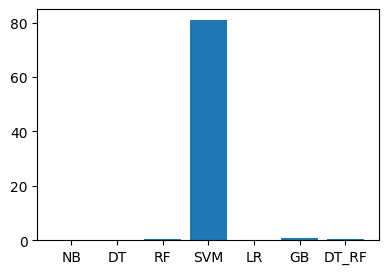

In [191]:
names = ['NB','DT','RF','SVM','LR','GB','DT_RF']
values = [0.13,0.06,0.41,80.83,0.0156,0.82,0.43]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)